In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from pprint import pp

from utils import CONFIG

In [20]:
top_k = 50

drop_columns = [
    "device",
    "learning_rate",
    "batch_size",
    "top_k",
    "seed",
    "epochs",
    "model",
    "datasets",
    "log"
]

if False:
    for k in CONFIG.top_k:
        if k != top_k:
            drop_columns.extend([f"Precision@{k}", f"Recall@{k}", f"NDCG@{k}"])

print(drop_columns)

['device', 'learning_rate', 'batch_size', 'top_k', 'seed', 'epochs', 'model', 'datasets', 'log']


In [21]:
files = os.listdir("logs")
settings = {}

for fname in files:
    with open(f"logs/{fname}", "r", encoding="utf-8") as fin:
        lines = list(fin)
        epochs, loss, *res = lines[-1].strip().split("\t")

        d = json.loads(lines[0])

        d["Epochs"] = int(epochs)
        d["Loss"] = float(loss)

        for i, k in enumerate(CONFIG.top_k):
            precision, recall, ndcg = res[i * 3:(i * 3)+3]
            d[f"Precision@{k}"] = float(precision)
            d[f"Recall@{k}"] = float(recall)
            d[f"NDCG@{k}"] = float(ndcg)

        settings[fname[:-4]] = d

df = pd.DataFrame(settings).T.convert_dtypes()
df = df.drop(columns=drop_columns)

df

,n_layers,embedding_dim,dataset,fusion_modalities,autoencoder,multimodal,single_branch,bidirectional,freeze,Epochs,...,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50,early_stop_window,early_stop_threshold
2025-01-15T18:43:58,0,64,dbbook,mean,False,False,False,False,True,218,...,0.0645,0.064,0.0339,0.1005,0.0786,0.0229,0.1702,0.1038,<NA>,<NA>
2025-01-15T18:44:19,0,64,dbbook,mean,False,False,False,True,True,215,...,0.0637,0.0628,0.0327,0.1,0.0771,0.0226,0.1699,0.1024,<NA>,<NA>
2025-01-15T18:44:33,0,128,dbbook,mean,False,False,False,False,True,131,...,0.0755,0.0746,0.037,0.1118,0.0892,0.0255,0.1888,0.1174,<NA>,<NA>
2025-01-15T18:44:48,0,128,dbbook,mean,False,False,False,True,True,133,...,0.0747,0.0732,0.0364,0.1114,0.0882,0.0246,0.1855,0.1149,<NA>,<NA>
2025-01-15T18:45:01,0,256,dbbook,mean,False,False,False,False,True,89,...,0.082,0.0815,0.0394,0.1211,0.097,0.0262,0.1975,0.1247,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-15T23:46:56,4,256,dbbook,mean,False,True,False,True,True,1000,...,0.0801,0.0749,0.0377,0.1204,0.091,0.0255,0.202,0.1197,<NA>,<NA>
2025-01-15T23:54:33,4,256,dbbook,max,False,True,False,False,True,1000,...,0.1005,0.0958,0.0479,0.1494,0.1154,0.0318,0.2438,0.1494,<NA>,<NA>
2025-01-16T00:05:47,4,256,dbbook,max,False,True,False,True,True,1000,...,0.0806,0.0754,0.0379,0.122,0.0917,0.0258,0.2027,0.1205,<NA>,<NA>
2025-01-16T16:47:11,0,128,dbbook,mean,False,True,False,False,True,273,...,0.0908,0.0888,0.0434,0.1345,0.1059,0.0287,0.2196,0.1364,50,0.05


In [22]:
df.where(
    (df["embedding_dim"] == 256) & (df["dataset"] == "dbbook") & (df["fusion_modalities"] == "max")
).groupby(
    ["bidirectional", "multimodal", "n_layers"]
)[["Precision@50", "Recall@50", "NDCG@50", "Loss", "Epochs"]].mean()

Precision@50  Recall@50  NDCG@50    Loss  \
bidirectional multimodal n_layers                                             
False         True       0               0.0305      0.229   0.1448    0.01   
                         1               0.0299     0.2301   0.1462  0.0168   
                         2               0.0311     0.2394   0.1491  0.0314   
                         3               0.0319     0.2446    0.152  0.0491   
                         4               0.0318     0.2438   0.1494  0.0699   
True          True       0               0.0304     0.2319    0.144  0.0097   
                         1               0.0269     0.2116   0.1264    0.01   
                         2               0.0267     0.2109    0.128  0.0099   
                         3               0.0246     0.1964   0.1167  0.0126   
                         4               0.0258     0.2027   0.1205  0.0149   

                                   Epochs  
bidirectional multimodal n_layers          
False         True       0          158.0  
                         1         1000.0  
                         2         1000.0  
                         3         1000.0  
                         4         1000.0  
True          True       0          154.0  
                         1          240.0  
                         2          641.0  
                         3         1000.0  
                         4         1000.0

In [23]:
df.rename(columns={"embedding_dim": "emb_dim", "fusion_modalities": "fusion"}).where(df["multimodal"] == False).groupby("n_layers")[["Precision@10", "Recall@10", "NDCG@10"]].mean()

,Precision@10,Recall@10,NDCG@10
n_layers,,,
0,0.0474,0.073333,0.072283
1,0.0479,0.075917,0.0729
2,0.051083,0.080533,0.0774
3,0.04985,0.0793,0.074933
4,0.050033,0.079383,0.0755


In [24]:
file = os.listdir("logs")[-1]
file_path = f"logs/{file}"

with open(file_path, 'r') as f:
    config_line = f.readline().strip()
    config = json.loads(config_line)

data = pd.read_csv(file_path, sep='\t', skiprows=1)

In [25]:
data

,Epoch,Loss,Precision@5,Recall@5,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50
0,1,0.6641,0.1651,0.0567,0.1801,0.1392,0.0928,0.1678,0.1136,0.1497,0.1688,0.0799,0.2510,0.1932
1,2,0.4111,0.1673,0.0569,0.1765,0.1423,0.0948,0.1676,0.1148,0.1518,0.1688,0.0809,0.2565,0.1947
2,3,0.3444,0.1789,0.0608,0.1919,0.1496,0.0992,0.1795,0.1209,0.1567,0.1793,0.0859,0.2694,0.2072
3,4,0.3221,0.1875,0.0636,0.2003,0.1560,0.1046,0.1867,0.1274,0.1656,0.1876,0.0902,0.2821,0.2160
4,5,0.3088,0.1944,0.0663,0.2095,0.1634,0.1092,0.1960,0.1320,0.1724,0.1960,0.0934,0.2925,0.2255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,0.0954,0.2337,0.1020,0.2509,0.2043,0.1667,0.2490,0.1701,0.2621,0.2641,0.1221,0.4296,0.3158
137,138,0.0961,0.2333,0.1016,0.2502,0.2042,0.1672,0.2488,0.1697,0.2614,0.2635,0.1218,0.4288,0.3152
138,139,0.0952,0.2326,0.1012,0.2498,0.2031,0.1664,0.2479,0.1689,0.2610,0.2627,0.1218,0.4290,0.3150
139,140,0.0958,0.2323,0.1005,0.2493,0.2020,0.1657,0.2468,0.1688,0.2610,0.2622,0.1218,0.4297,0.3147


In [26]:
epochs = data["Epoch"]
loss = data["Loss"]

{'n_layers': 0,
 'device': 'cuda',
 'batch_size': 2048,
 'embedding_dim': 128,
 'learning_rate': 0.001,
 'dataset': 'ml1m',
 'epochs': 1000,
 'model': 'ef-mmlgcn',
 'fusion_modalities': 'mean',
 'top_k': [5,
           10,
           20,
           50],
 'seed': 19,
 'autoencoder': False,
 'multimodal': True,
 'single_branch': False,
 'bidirectional': False,
 'early_stop_window': 50,
 'early_stop_threshold': 0.05,
 'freeze': True,
 'log': True,
 'datasets': {'dbbook': ['images',
                         'text'],
              'ml1m': ['audio',
                       'images',
                       'text',
                       'video']}}

Epoch           141.0000
Loss              0.0947
Precision@5       0.2306
Recall@5          0.0997
NDCG@5            0.2478
Precision@10      0.2017
Recall@10         0.1658
NDCG@10           0.2462
Precision@20      0.1687
Recall@20         0.2611
NDCG@20           0.2618
Precision@50      0.1215
Recall@50         0.4290
NDCG@50           0.3140
N

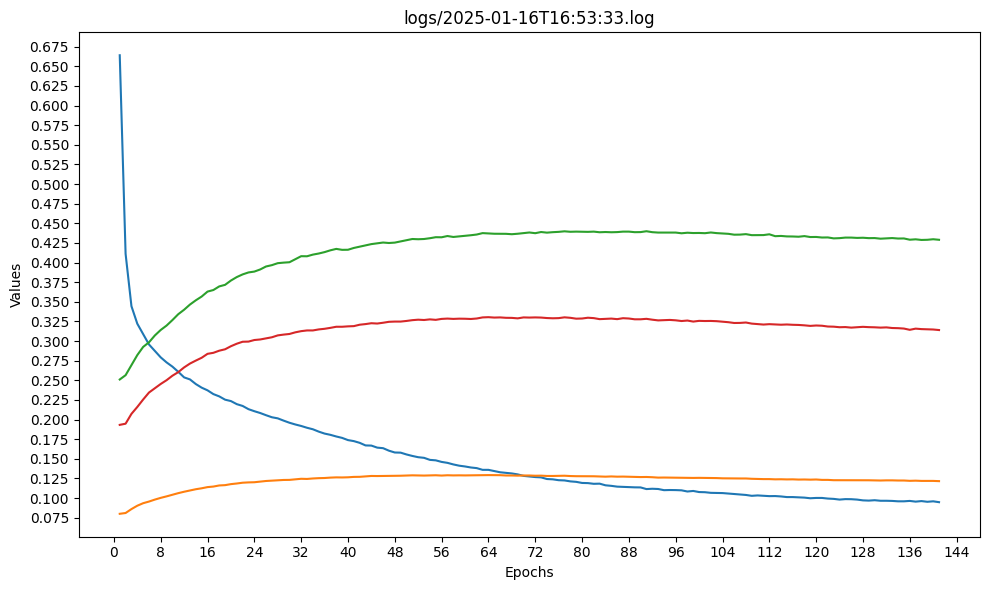

In [27]:
pp(config, width=1)
print()
print(data.iloc[-1])

plt.figure(figsize=(10, 6))

plt.plot(epochs, loss, label="Loss")

for k in [50]:
    plt.plot(epochs, data[f"Precision@{k}"], label=f"Precision@{k}")
    plt.plot(epochs, data[f"Recall@{k}"], label=f"Recall@{k}")
    plt.plot(epochs, data[f"NDCG@{k}"], label=f"NDCG@{k}")


plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title(file_path)
#plt.legend()

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=30))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
#plt.yscale("log")

plt.tight_layout()
plt.show()